In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import pymc as pm

sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

%matplotlib inline


In [21]:
#web上からデータをダウンロード
df = pd.read_csv('/content/txtdata.csv', header=None, names=['count'])

In [22]:
n_count = len(df['count'])
days = np.arange(n_count)

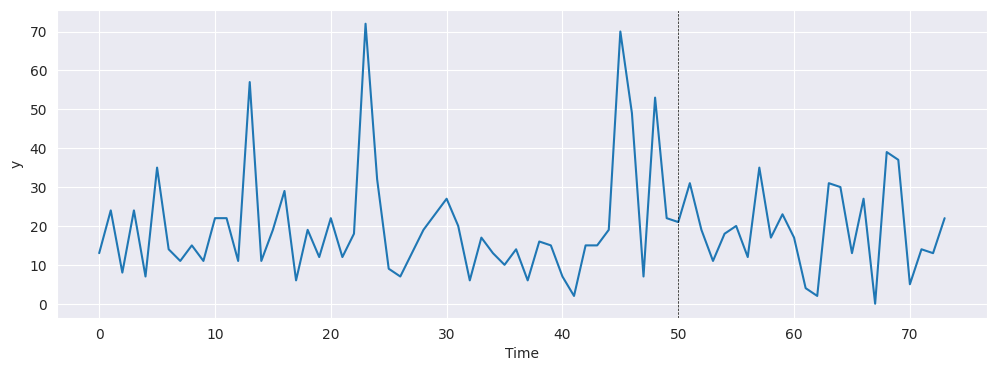

In [23]:
#visualize
plt.figure(figsize=(12, 4))
plt.plot(df)
plt.axvline(50, color='black', lw=0.5, ls='--')
plt.xlabel('Time')
plt.ylabel('y');

In [24]:
#bayes model
#initialize
basic_model = pm.Model()

with basic_model:
  alpha = 1/df['count'].mean()
  tau = pm.DiscreteUniform('tau', lower=0, upper=n_count) #λ変換のタイミングを離散一様分布で定義
  lambda1 = pm.Exponential('lambda1', alpha)#λ1の事前分布、初期パラは全体のカウントデータから最尤推定
  lambda2 = pm.Exponential('lambda2', alpha)#λ2も同様
  lambda_ = pm.math.switch(days < tau, lambda1, lambda2)#days

  observation = pm.Poisson('observation', lambda_, observed=df['count'])

In [25]:
with basic_model:
  trace = pm.sample(40000, tune=10000)

Output()

In [26]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
lambda1,17.754,0.634,16.578,18.967,0.002,0.002,76372.0,58766.0,1.0
lambda2,22.717,0.893,21.029,24.387,0.004,0.003,61041.0,56645.0,1.0
tau,44.313,0.811,43.000,45.000,0.008,0.005,11165.0,12416.0,1.0


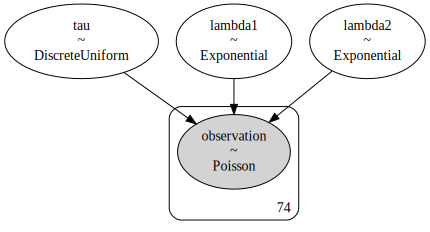

In [27]:
#可視化
import arviz as az
g = pm.model_to_graphviz(basic_model)
display(g)

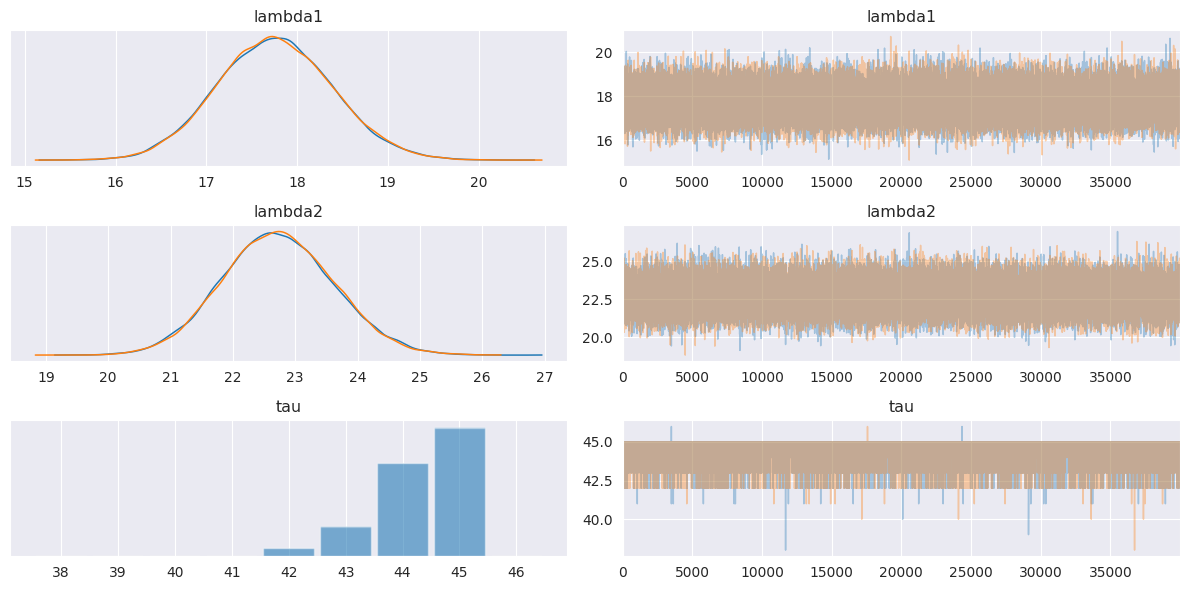

In [28]:
#推論過程
az.plot_trace(trace, compact=False)
plt.tight_layout();